<a href=https://github.com/xinntao/BasicSR><img src="https://raw.githubusercontent.com/xinntao/BasicSR/master/assets/basicsr.png" width="400"></a>

**félkövér szöveg**# DFDNet - Blind Face Restoration - Inference Demo

[[paper]](https://arxiv.org/abs/2008.00418)  [[official codes]](https://github.com/csxmli2016/DFDNet)

In this colab notebook, we will show how to perform blind face face restoration with DFDNet.<br>

Note that <br>
1. The codes are improved compared to the [official DFDNet codes](https://github.com/csxmli2016/DFDNet)
  
  i. The codes are more compact and clean.<br>
  ii. Support multiple faces processing in one image

2. We try to align to the official codes. But there are still **some slight**
differences:
  
  i. We use [dlib](https://github.com/davisking/dlib) for 68 landmark detection<br>
  ii. The used image package are different (especially for reading and writing) 

Enjoy!

# Preparations
Before start, make sure that you choose
* Runtime Type = Python 3
* Hardware Accelerator = GPU

in the **Runtime** menu -> **Change runtime type**


In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Git clone [BasicSR](https://github.com/xinntao/BasicSR) repo

In [2]:
!rm -rf BasicSR
!git clone https://github.com/xinntao/BasicSR.git
%cd BasicSR
!git checkout tags/v1.3.2

Cloning into 'BasicSR'...
remote: Enumerating objects: 5919, done.
remote: Counting objects: 100% (17/17), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 5919 (delta 4), reused 8 (delta 2), pack-reused 5902
Receiving objects: 100% (5919/5919), 4.16 MiB | 19.01 MiB/s, done.
Resolving deltas: 100% (3733/3733), done.
/content/BasicSR
Note: switching to 'tags/v1.3.2'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by switching back to a branch.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -c with the switch command. Example:

  git switch -c <new-branch-name>

Or undo this operation with:

  git switch -

Turn off this advice by setting config variable advice.detachedHead to false

HEAD is now at 366a46c version 1.3.2


## Set up the enviroment

In [3]:
# Install pytorch
!pip install torch torchvision

# Check torch and cuda versions
import torch
print('Torch Version: ', torch.__version__)
print('CUDA Version: ', torch.version.cuda)
print('CUDNN Version: ', torch.backends.cudnn.version())
print('CUDA Available:', torch.cuda.is_available())

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Torch Version:  2.0.0+cu118
CUDA Version:  11.8
CUDNN Version:  8700
CUDA Available: True


In [4]:
# Install requirements
!pip install -r requirements.txt
# DFDNet requires dlib: https://github.com/davisking/dlib
!pip install dlib
# Install BasicSR without cuda extentions
!python setup.py develop

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.5/298.5 kB 26.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 93.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.9/200.9 kB 26.3 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
/usr/local/lib/python3.9/dist-packages/setuptools/__init__.py:85: _DeprecatedInstaller: setuptools.installer and fetch_build_eggs are deprecated. Requirements should be satisfied by a PEP 517 installer. If you are using pip, you can try `pip install --use-pep517`.
  dist.fetch_build_eggs(dist.setup_requires)
running develop
/usr/local/lib/python3.9/dist-packages/setuptools/command/easy_install.py:144: EasyInstallDeprecationWarning: easy_install command is deprecated. Use build and pip and other standards-based tools.
  warnings.warn(
/usr/local/lib/python

## Download pretrained models

In [5]:
import os
os.mkdir('/content/BasicSR/experiments/pretrained_models/DFDNet')
os.mkdir('/content/BasicSR/experiments/pretrained_models/dlib')

In [6]:
!gdown 1iH00oMsoN_1OJaEQw3zP7_wqiAYMnY79 -O '/content/BasicSR/experiments/pretrained_models/DFDNet/DFDNet_dict_512-f79685f0.pth'
!gdown 1u6Sgcp8gVoy4uVTrOJKD3y9RuqH2JBAe -O '/content/BasicSR/experiments/pretrained_models/DFDNet/DFDNet_official-d1fa5650.pth'

Downloading...
From: https://drive.google.com/uc?id=1iH00oMsoN_1OJaEQw3zP7_wqiAYMnY79
To: /content/BasicSR/experiments/pretrained_models/DFDNet/DFDNet_dict_512-f79685f0.pth
100% 3.20G/3.20G [00:42<00:00, 74.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1u6Sgcp8gVoy4uVTrOJKD3y9RuqH2JBAe
To: /content/BasicSR/experiments/pretrained_models/DFDNet/DFDNet_official-d1fa5650.pth
100% 454M/454M [00:08<00:00, 56.7MB/s]


In [7]:
!gdown 1FUM-hcoxNzFCOpCWbAUStBBMiU4uIGIL -O '/content/BasicSR/experiments/pretrained_models/dlib/mmod_human_face_detector-4cb19393.dat'
!gdown 1PNPSmFjmbuuUDd5Mg5LDxyk7tu7TQv2F -O '/content/BasicSR/experiments/pretrained_models/dlib/shape_predictor_5_face_landmarks-c4b1e980.dat'
!gdown 1IneH-O-gNkG0SQpNCplwxtOAtRCkG2ni -O '/content/BasicSR/experiments/pretrained_models/dlib/shape_predictor_68_face_landmarks-fbdc2cb8.dat'

Downloading...
From: https://drive.google.com/uc?id=1FUM-hcoxNzFCOpCWbAUStBBMiU4uIGIL
To: /content/BasicSR/experiments/pretrained_models/dlib/mmod_human_face_detector-4cb19393.dat
100% 730k/730k [00:00<00:00, 145MB/s]
Downloading...
From: https://drive.google.com/uc?id=1PNPSmFjmbuuUDd5Mg5LDxyk7tu7TQv2F
To: /content/BasicSR/experiments/pretrained_models/dlib/shape_predictor_5_face_landmarks-c4b1e980.dat
100% 9.15M/9.15M [00:01<00:00, 5.65MB/s]
Downloading...
From: https://drive.google.com/uc?id=1IneH-O-gNkG0SQpNCplwxtOAtRCkG2ni
To: /content/BasicSR/experiments/pretrained_models/dlib/shape_predictor_68_face_landmarks-fbdc2cb8.dat
100% 99.7M/99.7M [00:05<00:00, 18.7MB/s]


# Inference with DFDNet



In [8]:
!pip install facexlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.6/59.6 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.0/178.0 kB 23.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for filterpy: filename=filterpy-1.4.5-py3-none-any.whl size=110473 sha256=c194855b978f19d9be6611c4c74d5e379870965565579f1dac11a12c7d7399e4
  Stored in directory: /root/.cache/pip/wheels/53/e6/de/a09ea01e923aaf88b9f8c7c44329e857b2c1a31901167e55e6
Successfully built filterpy


# Show results


In [9]:
import cv2
import matplotlib.pyplot as plt
def display(img1, img2):
  fig = plt.figure(figsize=(25, 10))
  ax1 = fig.add_subplot(1, 2, 1) 
  plt.title('Input image', fontsize=16)
  ax1.axis('off')
  ax2 = fig.add_subplot(1, 2, 2)
  plt.title('DFDNet output', fontsize=16)
  ax2.axis('off')
  ax1.imshow(img1)
  ax2.imshow(img2)
def imread(img_path):
  img = cv2.imread(img_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  return img

# Try it on uploaded images

## Find the FDF256 test set on google drive

In [10]:
from os.path import exists
import os
from google.colab import files
import shutil

dataset_folder = '/content/gdrive/MyDrive/val_images_lowres'
result_folder = 'results/DFDNet/val_images/'

if os.path.isdir(result_folder):
    shutil.rmtree(result_folder)

os.makedirs(result_folder, exist_ok=True)


## 2. Inference

In [11]:
# inference
!python inference/inference_dfdnet.py --upscale_factor 4 --test_path '/content/gdrive/MyDrive/val_images_lowres' --official_adaption True

A streamkimeneten csak az utolsó 5000 sor látható.
Processing 6014.png image ...
	Detect 1 faces, 1 landmarks.
	Detect 1 faces for 68 landmarks.
	Face restoration ...
DFDNet inference fail: Input and output sizes should be greater than 0, but got input (H: 44, W: 0) output (H: 40, W: 40)
	Generate the final result ...
Processing 6015.png image ...
	Detect 1 faces, 1 landmarks.
	Detect 1 faces for 68 landmarks.
	Face restoration ...
	Generate the final result ...
Processing 6016.png image ...
	Detect 1 faces, 1 landmarks.
	Detect 1 faces for 68 landmarks.
	Face restoration ...
	Generate the final result ...
Processing 6017.png image ...
	Detect 1 faces, 1 landmarks.
	Detect 1 faces for 68 landmarks.
	Face restoration ...
	Generate the final result ...
Processing 6018.png image ...
	Detect 1 faces, 1 landmarks.
	Detect 1 faces for 68 landmarks.
	Face restoration ...
	Generate the final result ...
Processing 6019.png image ...
	Detect 1 faces, 1 landmarks.
	Detect 1 faces for 68 landmarks

## 3. Visualize (Optional)

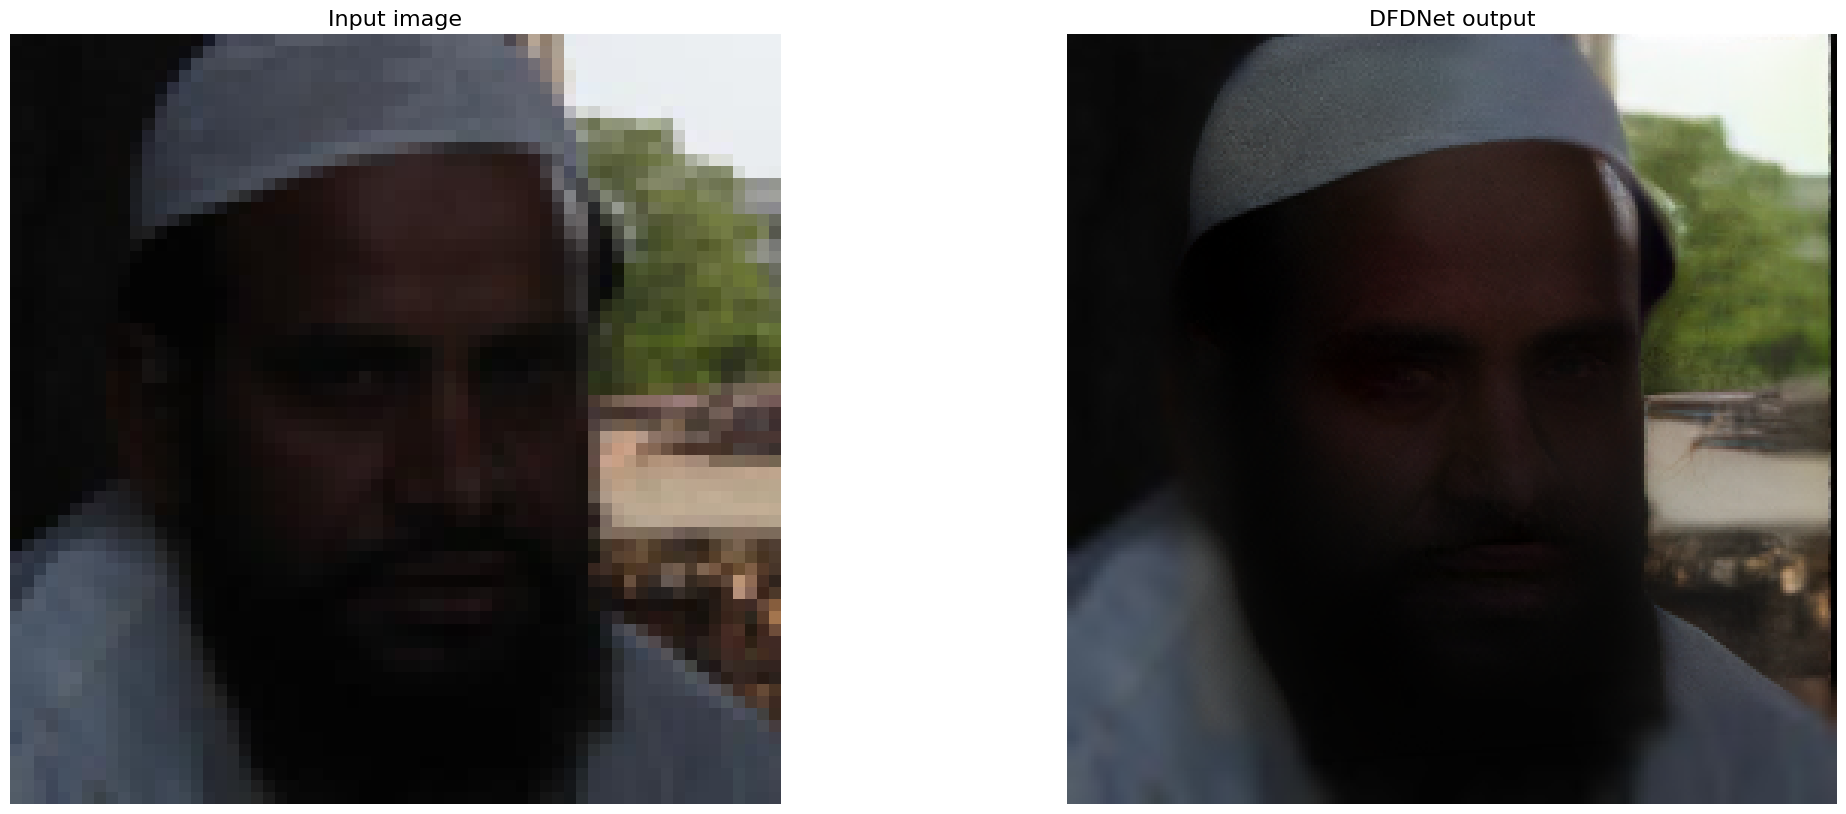

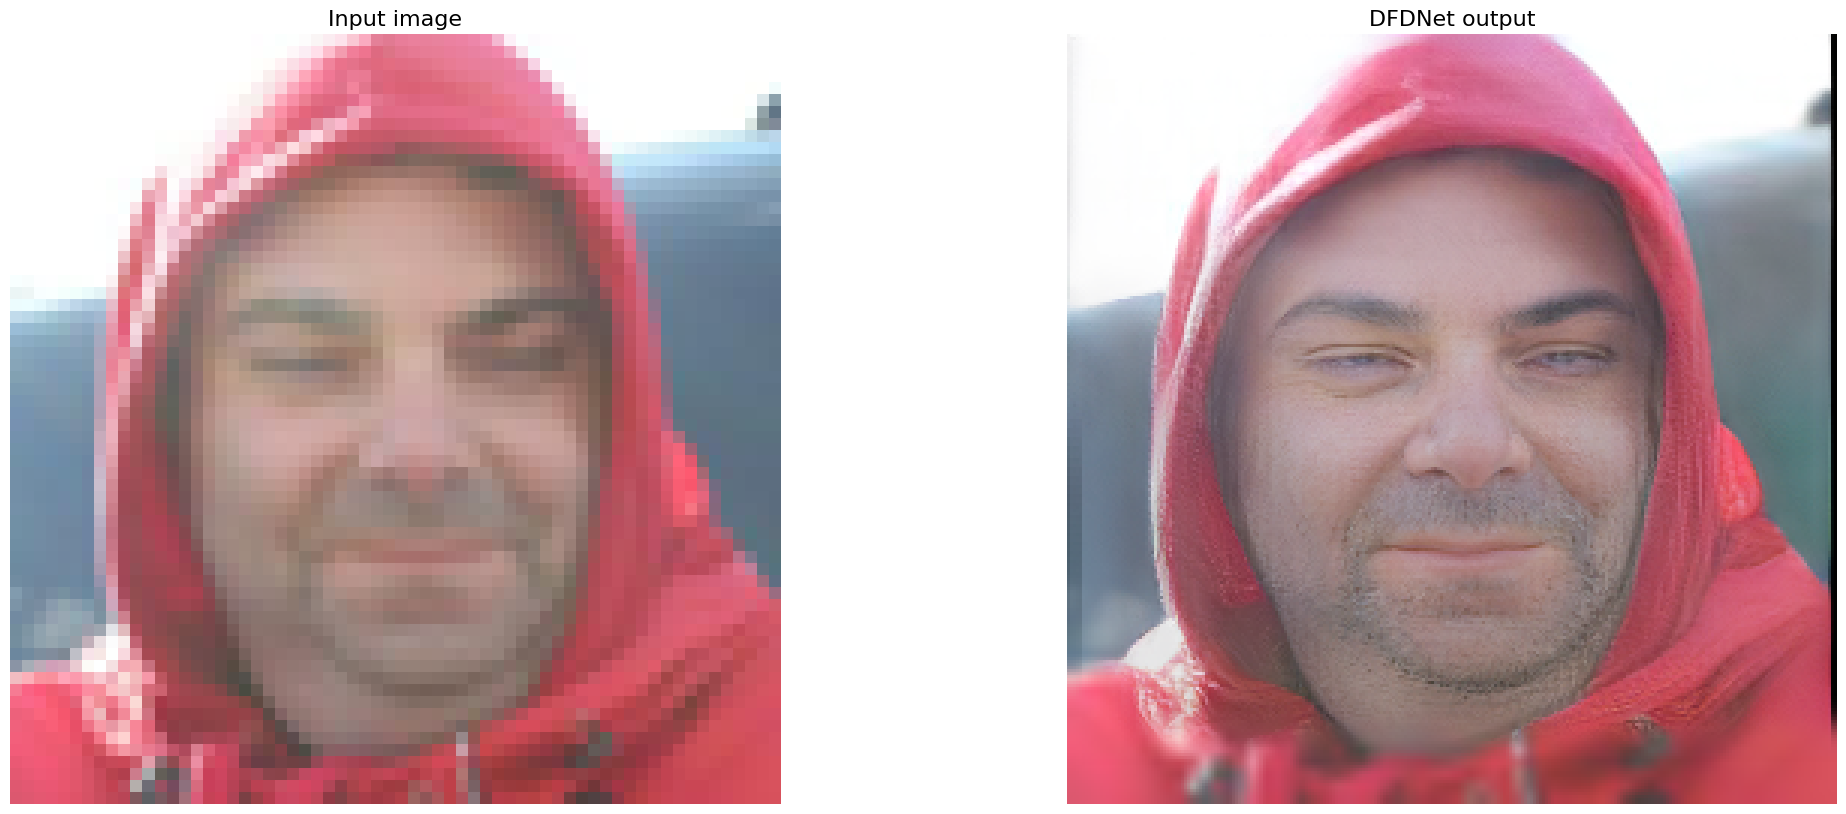

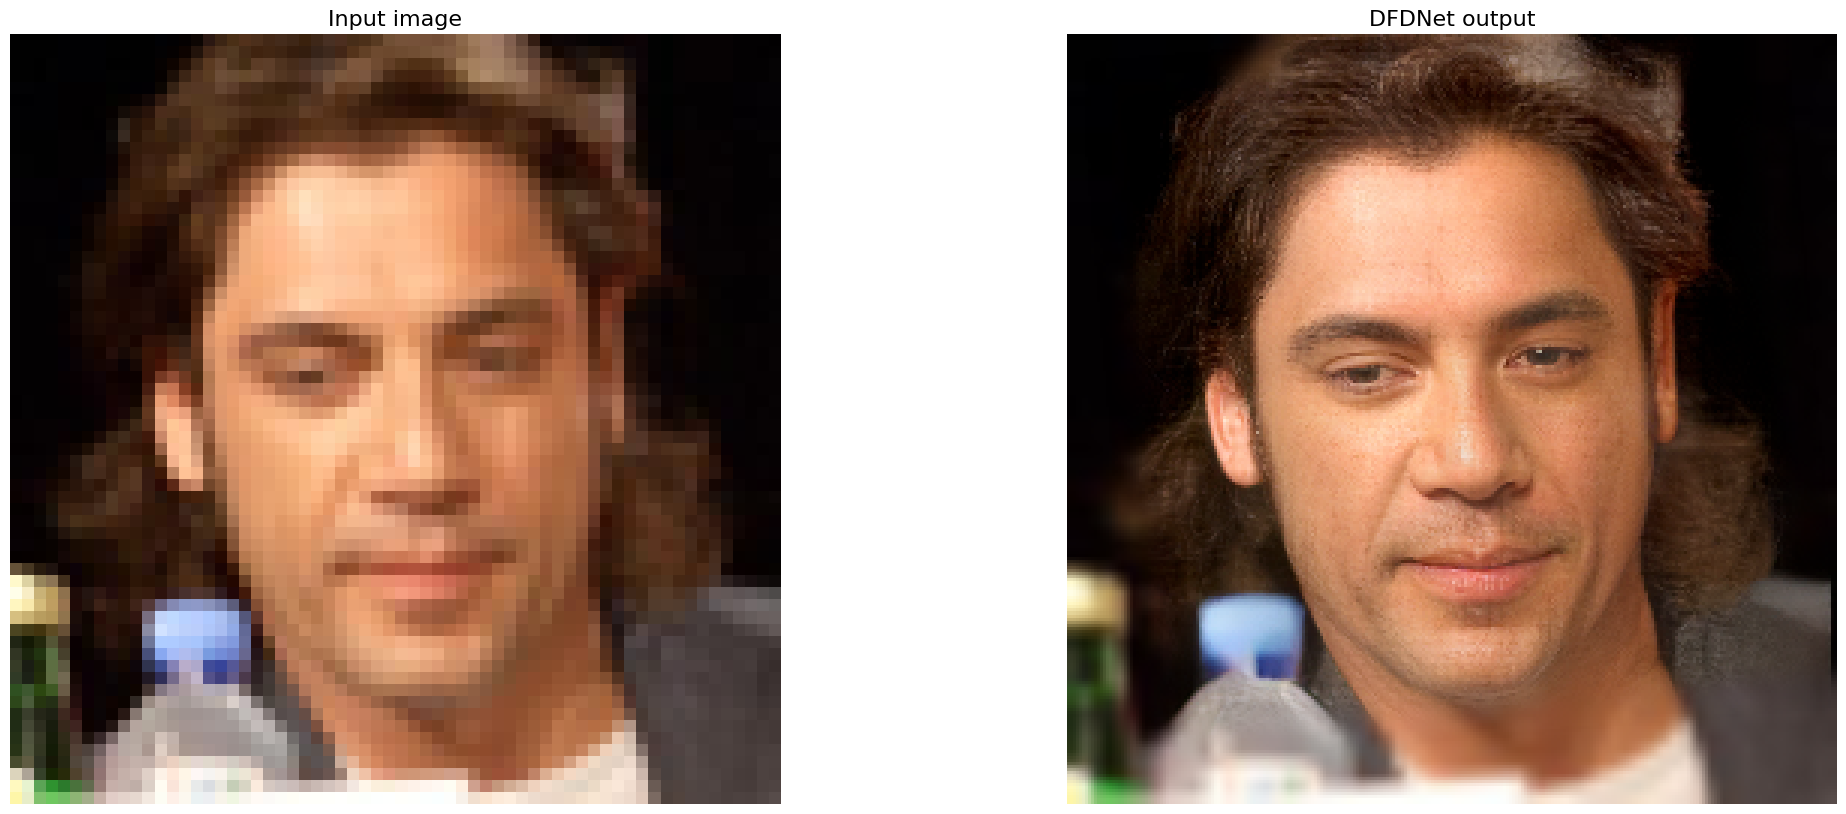

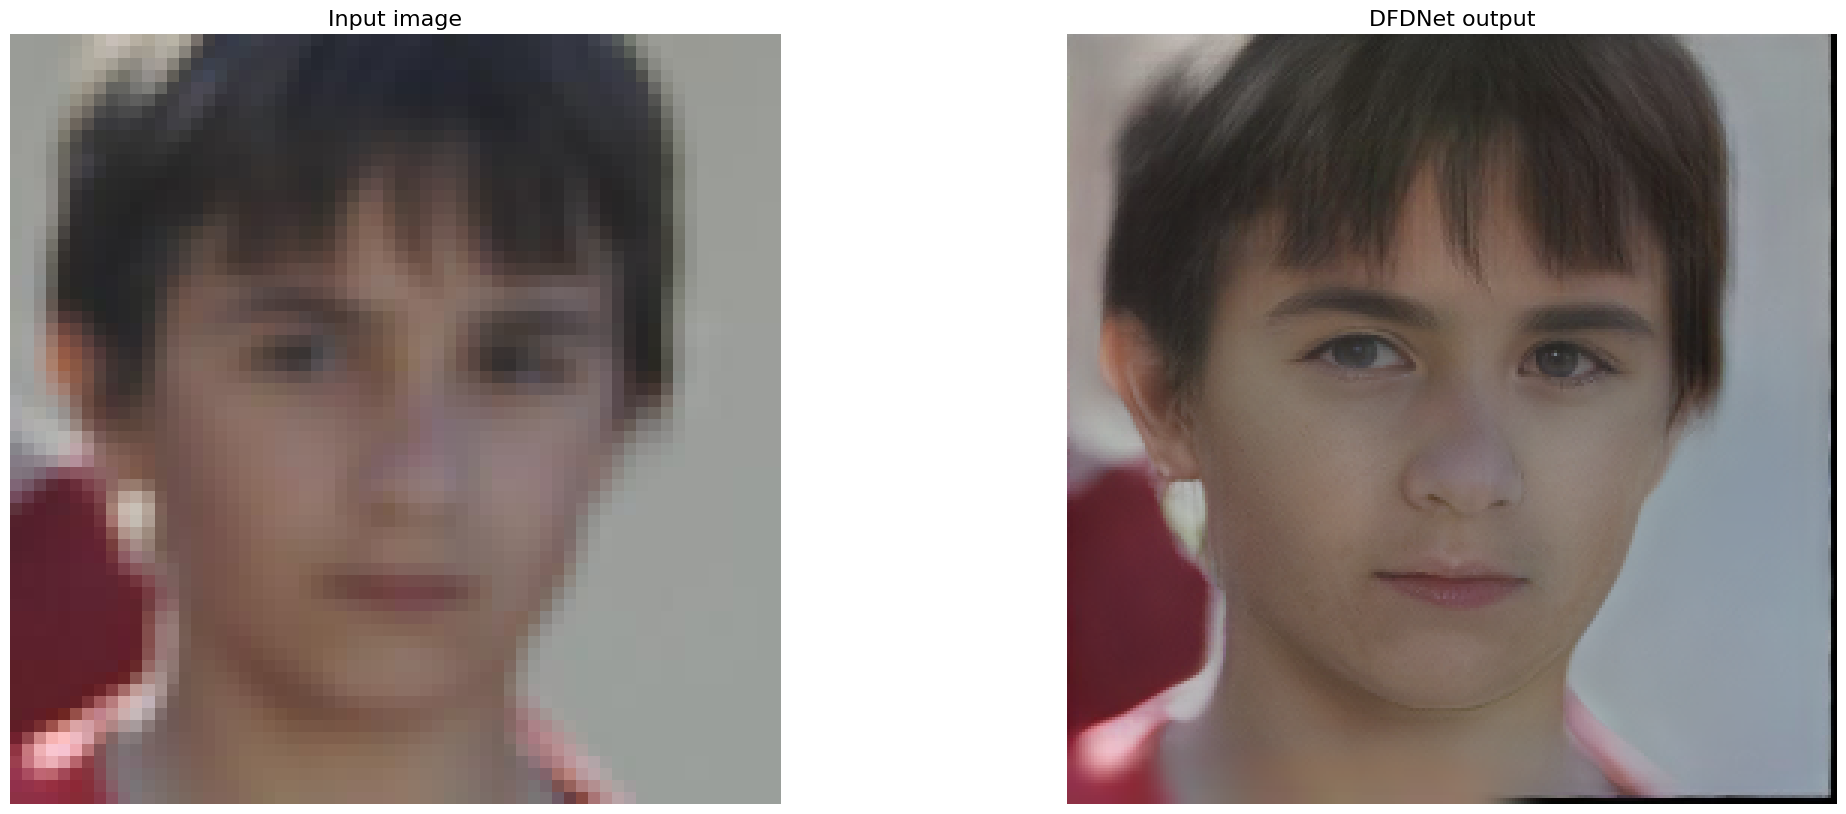

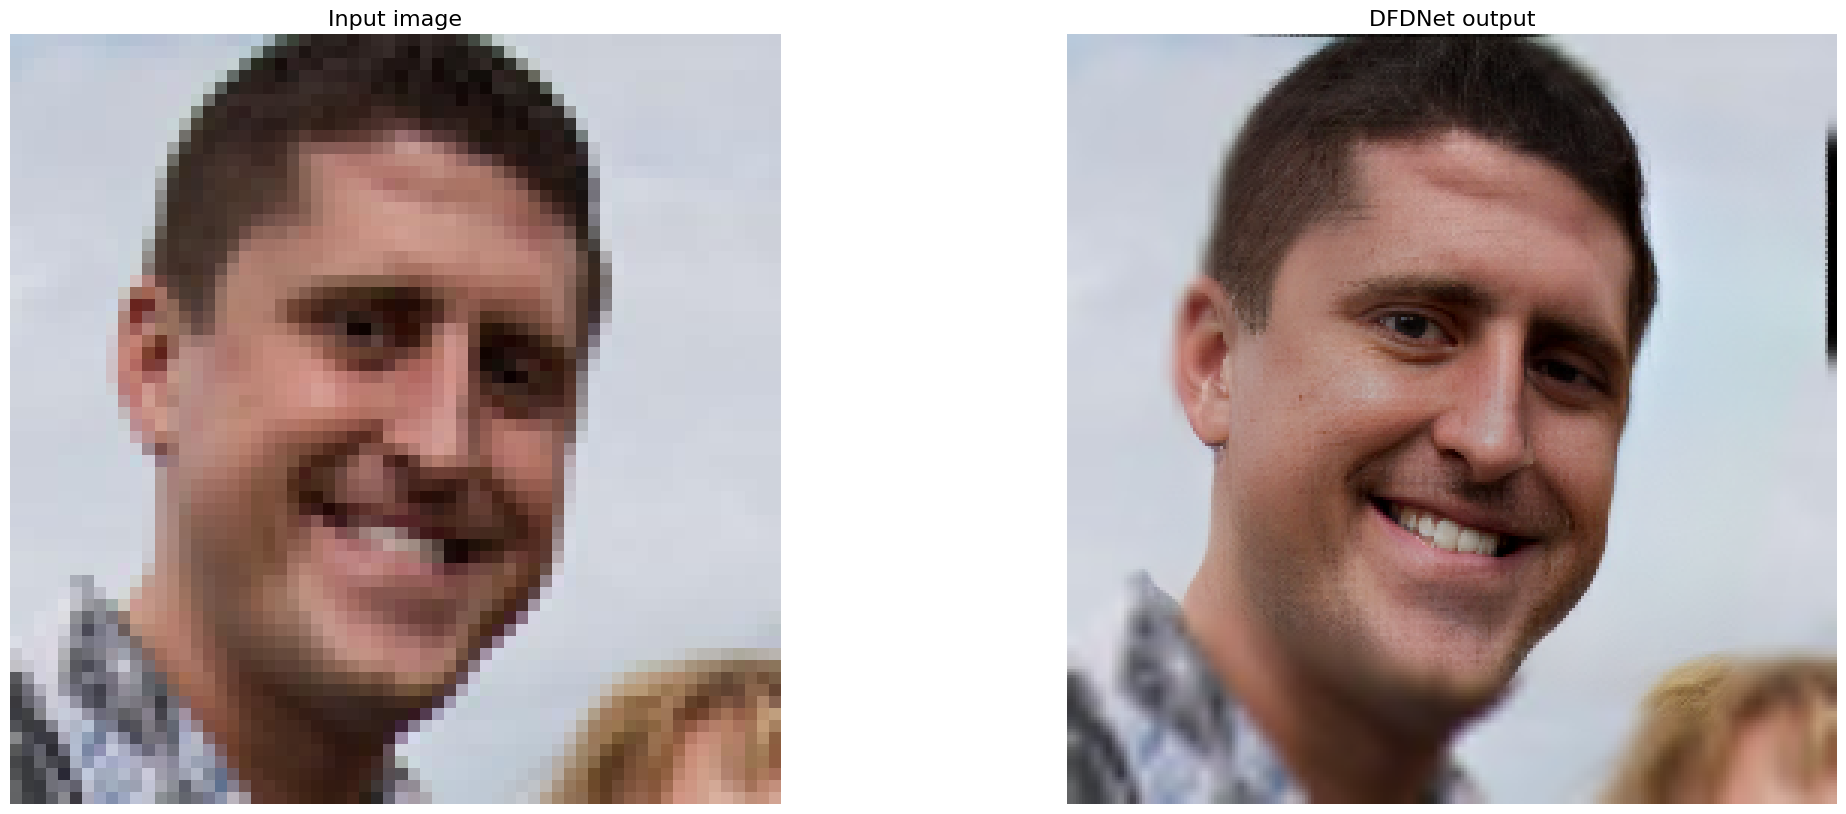

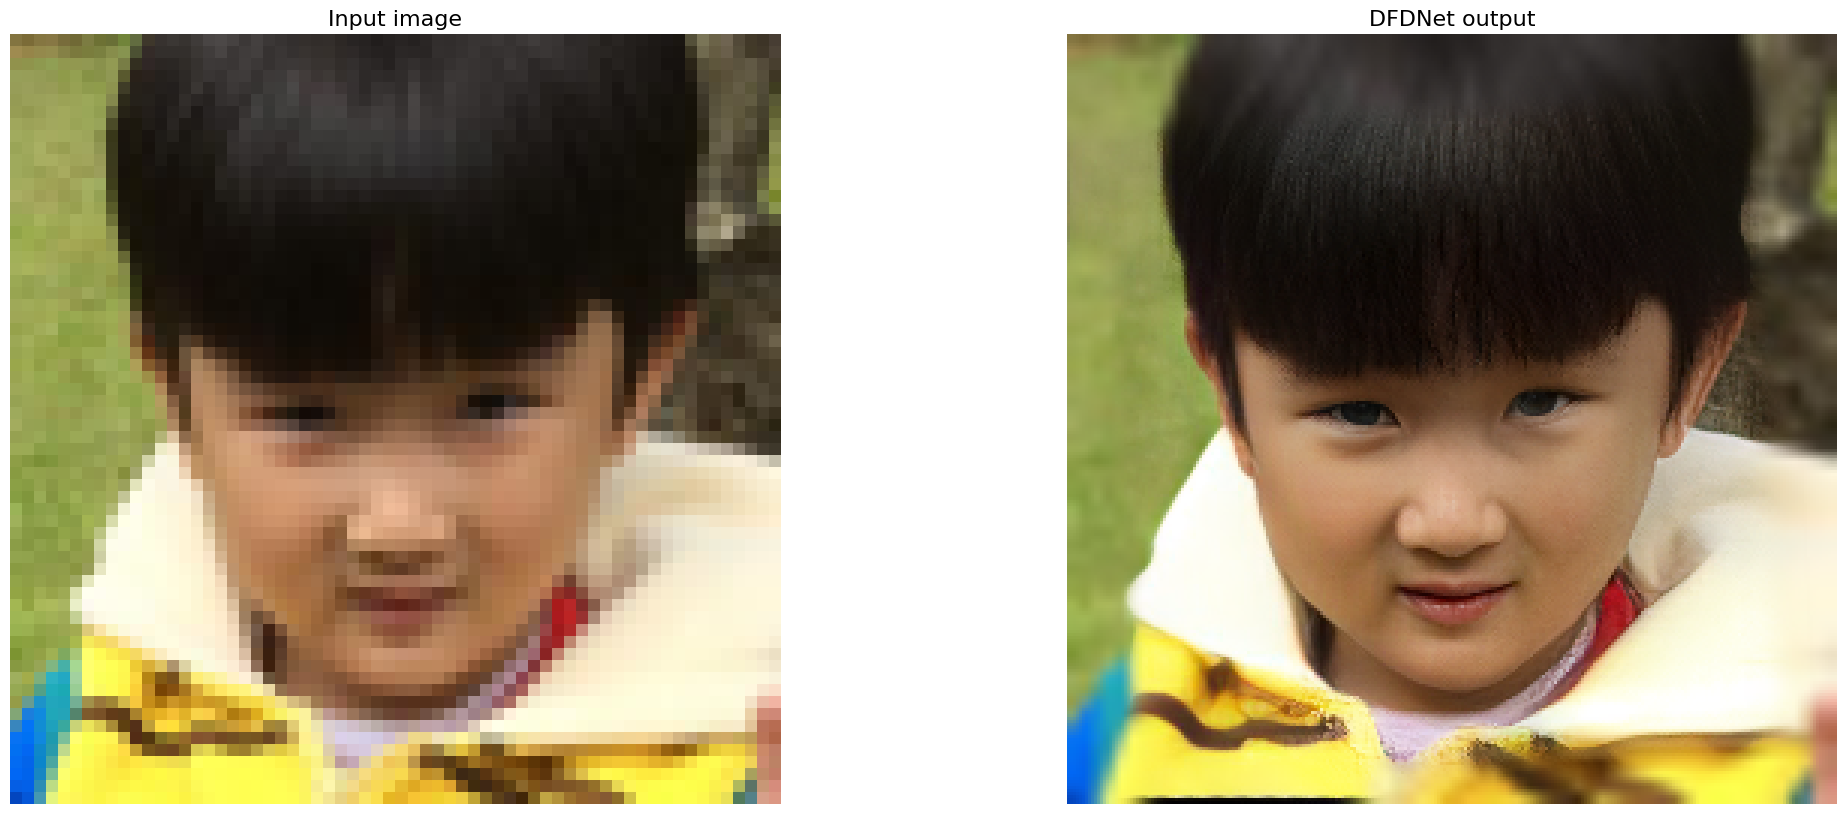

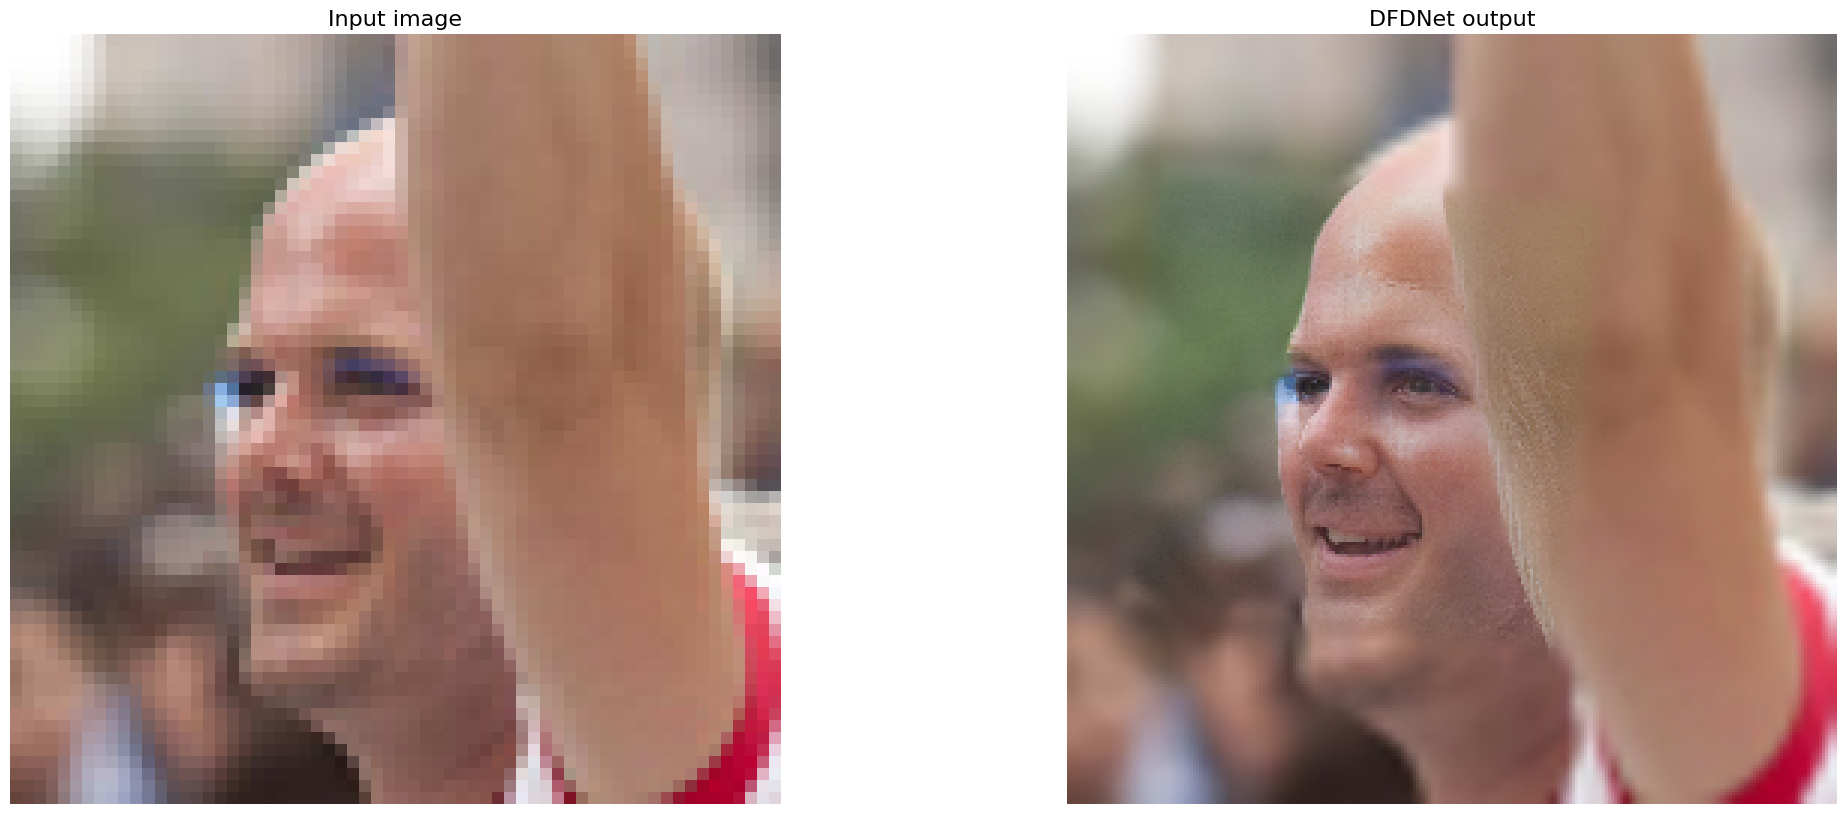

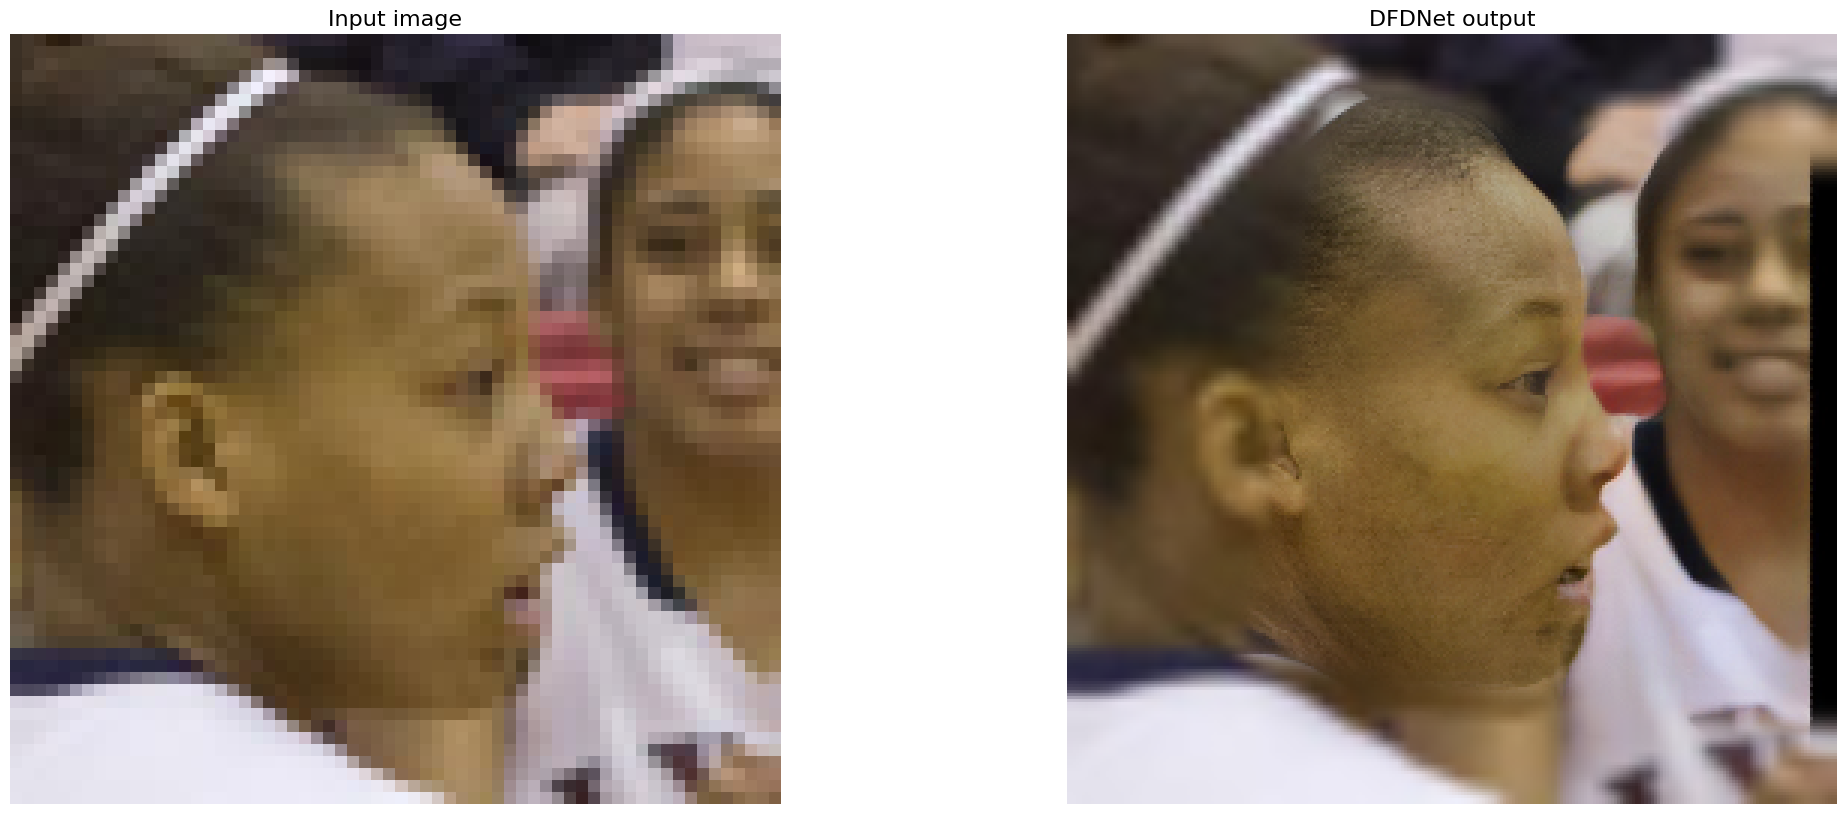

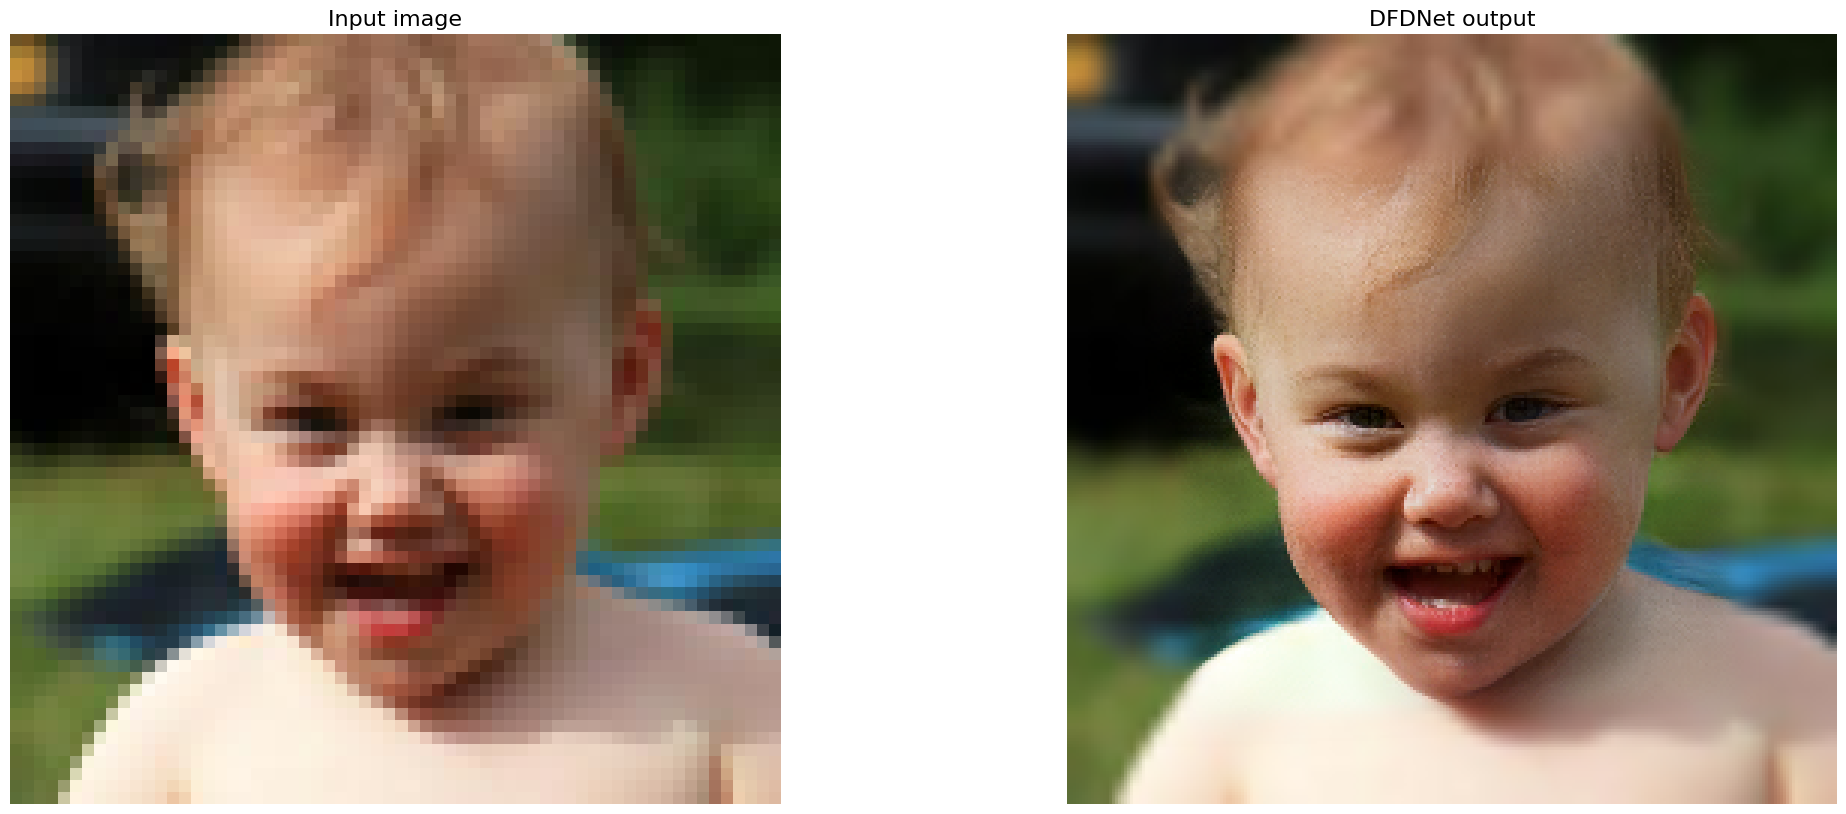

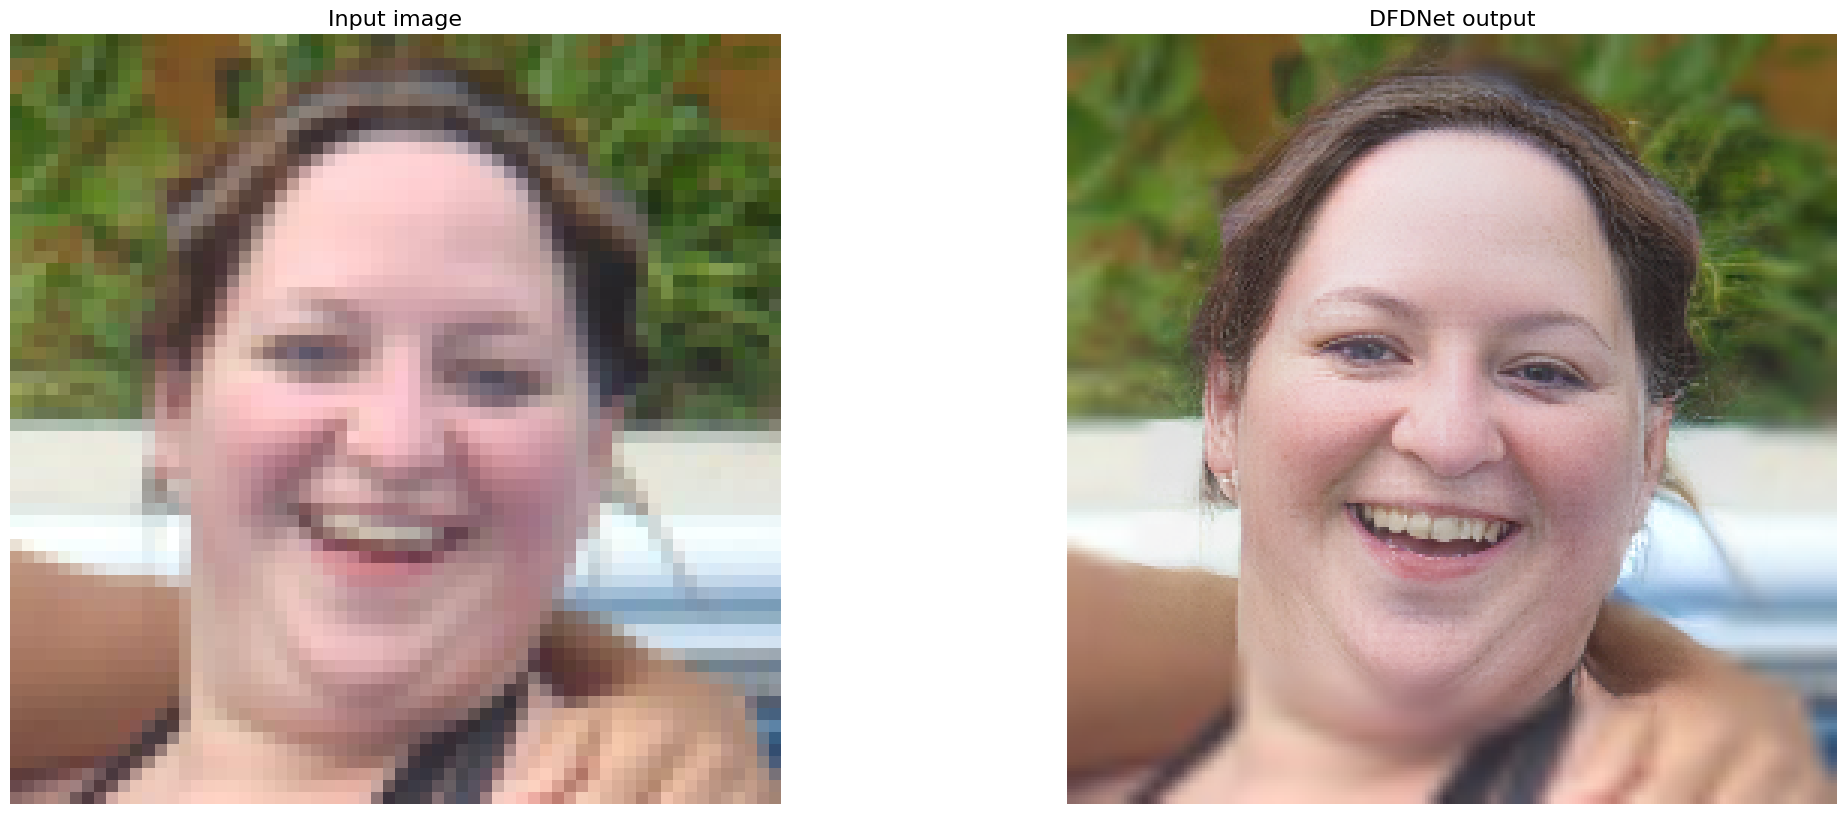

In [12]:
# visualize
import os
import glob

result_folder = 'results/DFDNet/val_images_lowres/final_results'
input_list = sorted(glob.glob(os.path.join(dataset_folder, '*')))
output_list = sorted(glob.glob(os.path.join(result_folder, '*')))
i = 0
for input_path, output_path in zip(input_list, output_list):
  if i == 10:
    break
  img_input = imread(input_path)
  img_output = imread(output_path)
  display(img_input, img_output)
  i += 1

## 4. Download results

In [13]:
# download the result
print(f'Download {result_folder}')
os.system(f'zip -r -j download.zip {result_folder}/*')
files.download("download.zip")

Download results/DFDNet/val_images_lowres/final_results


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [19]:
import shutil
colab_link = "/content/BasicSR/results/DFDNet/val_images_lowres/final_results/"
gdrive_link = "/content/gdrive/MyDrive/results_lowres/"
shutil.copytree(colab_link, gdrive_link)

'/content/gdrive/MyDrive/results_lowres/'

In [23]:
print('hello')

hello
